# 浅层神经网络 - S形激活函数

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

X, y = make_circles(n_samples=500, noise=0.1, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

n_train = 400
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.uniform_(m.weight, a=0, b=1)

    def forward(self, x):
        return self.layers(x)


model = MLP()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)

epochs = 2000
loss_hist = []
val_loss_hist = []
train_correct_hist = []
test_correct_hist = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.tensor(trainX, dtype=torch.float32))
    loss = criterion(outputs.squeeze(), torch.tensor(trainy, dtype=torch.float32))
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(torch.tensor(testX, dtype=torch.float32))
        val_loss = criterion(val_outputs.squeeze(), torch.tensor(testy, dtype=torch.float32))

        loss_hist.append(loss)
        val_loss_hist.append(val_loss)

        train_correct_hist.append((outputs.round().squeeze().numpy() == trainy).astype(float).mean())
        test_correct_hist.append((val_outputs.round().squeeze().numpy() == testy).astype(float).mean())

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

        # gradInfo = [f'Epoch {epoch+1}']
        # for name, param in model.named_parameters():
        #     if param.grad is not None:
        #         layer_grad_norm = param.grad.data.norm(2) / param.numel() ** 0.5
        #         gradInfo.append(f'{name} ags {layer_grad_norm.item()}')
        # print(','.join(gradInfo))

# plt.plot(range(0, epochs, 1), [loss.item() for loss in loss_hist], label='train loss')
# plt.plot(range(0, epochs, 1), [val_loss.item() for val_loss in val_loss_hist], label='test loss')
plt.plot(range(0, epochs, 1), train_correct_hist, label='train acc')
plt.plot(range(0, epochs, 1), test_correct_hist, label='test acc')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'torch'

# 多层神经网络 - S形激活函数 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

X, y = make_circles(n_samples=500, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

n_train = 400
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.uniform_(m.weight, a=0, b=1)

    def forward(self, x):
        return self.layers(x)


model = MLP()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)

epochs = 2000
loss_hist = []
val_loss_hist = []
train_correct_hist = []
test_correct_hist = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.tensor(trainX, dtype=torch.float32))
    loss = criterion(outputs.squeeze(), torch.tensor(trainy, dtype=torch.float32))
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(torch.tensor(testX, dtype=torch.float32))
        val_loss = criterion(val_outputs.squeeze(), torch.tensor(testy, dtype=torch.float32))

        loss_hist.append(loss)
        val_loss_hist.append(val_loss)

        train_correct_hist.append((outputs.round().squeeze().numpy() == trainy).astype(float).mean())
        test_correct_hist.append((val_outputs.round().squeeze().numpy() == testy).astype(float).mean())

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# pyplot.plot(range(0, epochs, 1), [loss.item() for loss in loss_hist], label='train loss')
# pyplot.plot(range(0, epochs, 1), [val_loss.item() for val_loss in val_loss_hist], label='test loss')
pyplot.plot(range(0, epochs, 1), train_correct_hist, label='train acc')
pyplot.plot(range(0, epochs, 1), test_correct_hist, label='test acc')
pyplot.legend()
pyplot.show()

# 多层神经网络 - ReLU激活函数

Epoch [500/2000], Loss: 0.3355, Val Loss: 0.5695
Epoch [1000/2000], Loss: 0.3279, Val Loss: 0.5956
Epoch [1500/2000], Loss: 0.3241, Val Loss: 0.6008
Epoch [2000/2000], Loss: 0.3167, Val Loss: 0.6282


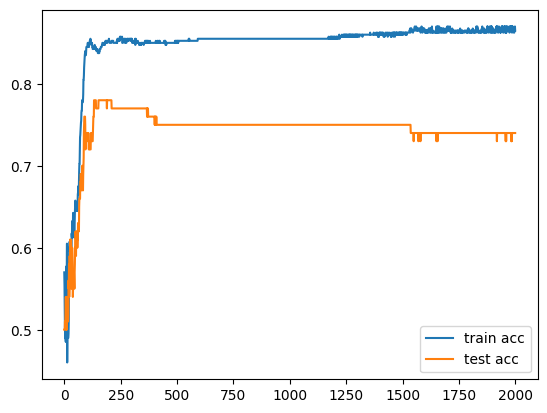

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

X, y = make_circles(n_samples=500, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

n_train = 400
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

        for m in self.modules():
            if isinstance(m, nn.Linear):
                # nn.init.uniform_(m.weight, a=0, b=1)
                nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')


    def forward(self, x):
        return self.layers(x)


model = MLP()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)

epochs = 2000
loss_hist = []
val_loss_hist = []
train_correct_hist = []
test_correct_hist = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.tensor(trainX, dtype=torch.float32))
    loss = criterion(outputs.squeeze(), torch.tensor(trainy, dtype=torch.float32))
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(torch.tensor(testX, dtype=torch.float32))
        val_loss = criterion(val_outputs.squeeze(), torch.tensor(testy, dtype=torch.float32))

        loss_hist.append(loss)
        val_loss_hist.append(val_loss)

        train_correct_hist.append((outputs.round().squeeze().numpy() == trainy).astype(float).mean())
        test_correct_hist.append((val_outputs.round().squeeze().numpy() == testy).astype(float).mean())


    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# 绘制训练历史
# pyplot.plot(range(0, epochs, 1), [loss.item() for loss in loss_hist], label='train loss')  # 示例数据，实际应记录每个epoch的损失
# pyplot.plot(range(0, epochs, 1), [val_loss.item() for val_loss in val_loss_hist], label='test loss')  # 示例数据，实际应记录每个epoch的验证损失
pyplot.plot(range(0, epochs, 1), train_correct_hist, label='train acc')
pyplot.plot(range(0, epochs, 1), test_correct_hist, label='test acc')
pyplot.legend()
pyplot.show()

# 梯度爆炸的神经网络

Epoch [10/100], Train Loss: inf, Test Loss: nan
Epoch [20/100], Train Loss: nan, Test Loss: nan
Epoch [30/100], Train Loss: nan, Test Loss: nan
Epoch [40/100], Train Loss: nan, Test Loss: nan
Epoch [50/100], Train Loss: nan, Test Loss: nan
Epoch [60/100], Train Loss: nan, Test Loss: nan
Epoch [70/100], Train Loss: nan, Test Loss: nan
Epoch [80/100], Train Loss: nan, Test Loss: nan
Epoch [90/100], Train Loss: nan, Test Loss: nan
Epoch [100/100], Train Loss: nan, Test Loss: nan
Train: nan, Test: nan


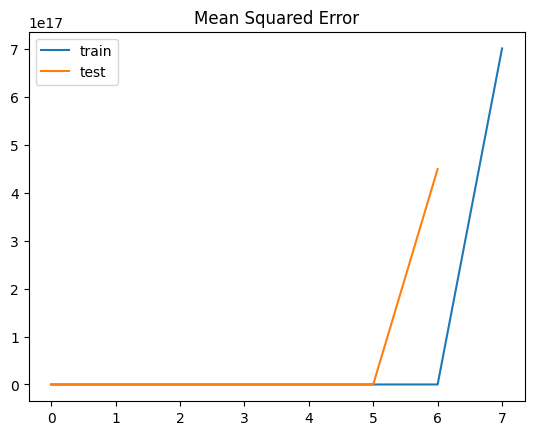

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from matplotlib import pyplot
import numpy as np
import torch.nn.init as init

X, y = make_regression(n_samples=500, n_features=20, noise=0.1, random_state=49)

n_train = 400
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

trainX = torch.tensor(trainX, dtype=torch.float32)
testX = torch.tensor(testX, dtype=torch.float32)
trainy = torch.tensor(trainy, dtype=torch.float32).view(-1, 1)
testy = torch.tensor(testy, dtype=torch.float32).view(-1, 1)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(20, 25)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(25, 1)

        init.kaiming_uniform_(self.fc1.weight, mode='fan_in', nonlinearity='relu')
        if self.fc1.bias is not None:
            init.constant_(self.fc1.bias, 0)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


model = MLP()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_function = nn.MSELoss()

num_epochs = 100
history = {'train': [], 'test': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(trainX)
    loss = loss_function(outputs, trainy)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        test_outputs = model(testX)
        test_loss = loss_function(test_outputs, testy)

    history['train'].append(loss.item())
    history['test'].append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

model.eval()
with torch.no_grad():
    train_mse = loss_function(model(trainX), trainy).item()
    test_mse = loss_function(model(testX), testy).item()
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

pyplot.title('Mean Squared Error')
pyplot.plot(history['train'], label='train')
pyplot.plot(history['test'], label='test')
pyplot.legend()
pyplot.show()

# 梯度缩放

Epoch [10/1000], Train Loss: 31418.1855, Test Loss: 29511.5234
Epoch [20/1000], Train Loss: 31199.2578, Test Loss: 29373.8398
Epoch [30/1000], Train Loss: 30833.5469, Test Loss: 29111.9570
Epoch [40/1000], Train Loss: 30280.3652, Test Loss: 28685.0703
Epoch [50/1000], Train Loss: 29526.2500, Test Loss: 28073.5430
Epoch [60/1000], Train Loss: 28571.3848, Test Loss: 27279.9004
Epoch [70/1000], Train Loss: 27433.6680, Test Loss: 26324.0000
Epoch [80/1000], Train Loss: 26121.8984, Test Loss: 25204.3594
Epoch [90/1000], Train Loss: 24650.8008, Test Loss: 23944.0508
Epoch [100/1000], Train Loss: 23041.1191, Test Loss: 22550.8359
Epoch [110/1000], Train Loss: 21312.5703, Test Loss: 21040.3867
Epoch [120/1000], Train Loss: 19491.1016, Test Loss: 19434.4688
Epoch [130/1000], Train Loss: 17602.3730, Test Loss: 17751.3672
Epoch [140/1000], Train Loss: 15672.8496, Test Loss: 16014.3867
Epoch [150/1000], Train Loss: 13731.3799, Test Loss: 14242.8701
Epoch [160/1000], Train Loss: 11807.8750, Test Lo

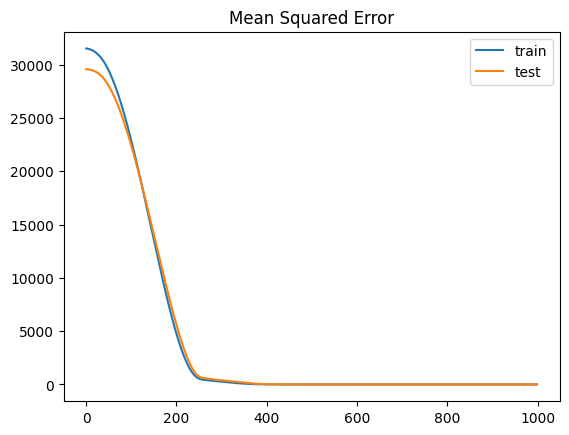

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils import clip_grad_norm_
from sklearn.datasets import make_regression
from matplotlib import pyplot
import numpy as np

X, y = make_regression(n_samples=500, n_features=20, noise=0.1, random_state=1)

n_train = 400
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

trainX = torch.tensor(trainX, dtype=torch.float32)
testX = torch.tensor(testX, dtype=torch.float32)
trainy = torch.tensor(trainy, dtype=torch.float32).view(-1, 1)
testy = torch.tensor(testy, dtype=torch.float32).view(-1, 1)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(20, 25)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(25, 1)

        init.kaiming_uniform_(self.fc1.weight, mode='fan_in', nonlinearity='relu')
        if self.fc1.bias is not None:
            init.constant_(self.fc1.bias, 0)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = MLP()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_function = nn.MSELoss()

num_epochs = 1000
max_grad_norm = 1
history = {'train': [], 'test': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(trainX)
    loss = loss_function(outputs, trainy)
    loss.backward()

    # 梯度范数缩放
    clip_grad_norm_(model.parameters(), max_grad_norm)

    optimizer.step()

    with torch.no_grad():
        test_outputs = model(testX)
        test_loss = loss_function(test_outputs, testy)

    history['train'].append(loss.item())
    history['test'].append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

model.eval()
with torch.no_grad():
    train_mse = loss_function(model(trainX), trainy).item()
    test_mse = loss_function(model(testX), testy).item()
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

pyplot.title('Mean Squared Error')
pyplot.plot(history['train'], label='train')
pyplot.plot(history['test'], label='test')
pyplot.legend()
pyplot.show()

# 梯度剪裁

Epoch [10/1000], Train Loss: 13772.4766, Test Loss: 10507.9473
Epoch [20/1000], Train Loss: 7119.1113, Test Loss: 5899.4717
Epoch [30/1000], Train Loss: 1765.4521, Test Loss: 3018.3816
Epoch [40/1000], Train Loss: 619.8437, Test Loss: 734.7411
Epoch [50/1000], Train Loss: 185.2637, Test Loss: 426.8914
Epoch [60/1000], Train Loss: 203.7595, Test Loss: 313.4269
Epoch [70/1000], Train Loss: 74.0206, Test Loss: 288.2717
Epoch [80/1000], Train Loss: 115.7077, Test Loss: 384.9533
Epoch [90/1000], Train Loss: 128.5927, Test Loss: 236.8116
Epoch [100/1000], Train Loss: 162.6655, Test Loss: 246.8390
Epoch [110/1000], Train Loss: 93.0053, Test Loss: 242.7159
Epoch [120/1000], Train Loss: 52.7715, Test Loss: 215.6466
Epoch [130/1000], Train Loss: 62.7990, Test Loss: 201.1454
Epoch [140/1000], Train Loss: 47.1896, Test Loss: 187.1455
Epoch [150/1000], Train Loss: 61.8355, Test Loss: 242.0868
Epoch [160/1000], Train Loss: 81.1071, Test Loss: 270.4179
Epoch [170/1000], Train Loss: 74.6319, Test Loss

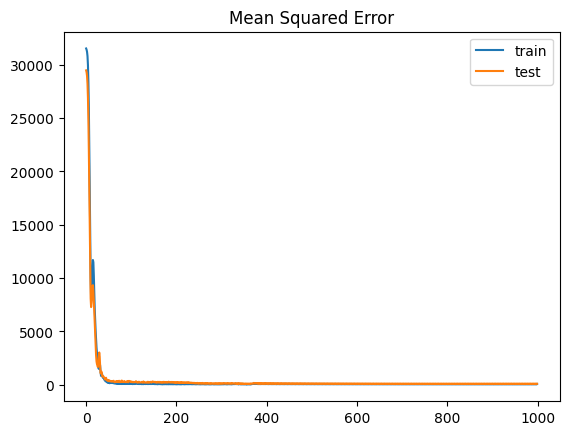

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils import clip_grad_value_
from sklearn.datasets import make_regression
from matplotlib import pyplot
import numpy as np

X, y = make_regression(n_samples=500, n_features=20, noise=0.1, random_state=1)

n_train = 400
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

trainX = torch.tensor(trainX, dtype=torch.float32)
testX = torch.tensor(testX, dtype=torch.float32)
trainy = torch.tensor(trainy, dtype=torch.float32).view(-1, 1)
testy = torch.tensor(testy, dtype=torch.float32).view(-1, 1)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(20, 25)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(25, 1)
        
        init.kaiming_uniform_(self.fc1.weight, mode='fan_in', nonlinearity='relu')
        if self.fc1.bias is not None:
            init.constant_(self.fc1.bias, 0)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = MLP()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_function = nn.MSELoss()

num_epochs = 1000
clip_value = 5.0  # 设置梯度裁剪的最大绝对值
history = {'train': [], 'test': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(trainX)
    loss = loss_function(outputs, trainy)
    loss.backward()

    # 梯度裁剪
    clip_grad_value_(model.parameters(), clip_value)

    optimizer.step()

    with torch.no_grad():
        test_outputs = model(testX)
        test_loss = loss_function(test_outputs, testy)

    history['train'].append(loss.item())
    history['test'].append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# 评估模型
model.eval()
with torch.no_grad():
    train_mse = loss_function(model(trainX), trainy).item()
    test_mse = loss_function(model(testX), testy).item()
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

pyplot.title('Mean Squared Error')
pyplot.plot(history['train'], label='train')
pyplot.plot(history['test'], label='test')
pyplot.legend()
pyplot.show()

# 过拟合

Epoch [500/20000], Loss: 0.6721, Val Loss: 0.6860
Epoch [1000/20000], Loss: 0.6700, Val Loss: 0.6863
Epoch [1500/20000], Loss: 0.6687, Val Loss: 0.6859
Epoch [2000/20000], Loss: 0.6677, Val Loss: 0.6855
Epoch [2500/20000], Loss: 0.6671, Val Loss: 0.6852
Epoch [3000/20000], Loss: 0.6667, Val Loss: 0.6850
Epoch [3500/20000], Loss: 0.6664, Val Loss: 0.6849
Epoch [4000/20000], Loss: 0.6662, Val Loss: 0.6848
Epoch [4500/20000], Loss: 0.6660, Val Loss: 0.6847
Epoch [5000/20000], Loss: 0.6659, Val Loss: 0.6847
Epoch [5500/20000], Loss: 0.6658, Val Loss: 0.6846
Epoch [6000/20000], Loss: 0.6657, Val Loss: 0.6846
Epoch [6500/20000], Loss: 0.6657, Val Loss: 0.6846
Epoch [7000/20000], Loss: 0.6657, Val Loss: 0.6845
Epoch [7500/20000], Loss: 0.6656, Val Loss: 0.6845
Epoch [8000/20000], Loss: 0.6656, Val Loss: 0.6845
Epoch [8500/20000], Loss: 0.6656, Val Loss: 0.6845
Epoch [9000/20000], Loss: 0.6656, Val Loss: 0.6845
Epoch [9500/20000], Loss: 0.6656, Val Loss: 0.6845
Epoch [10000/20000], Loss: 0.665

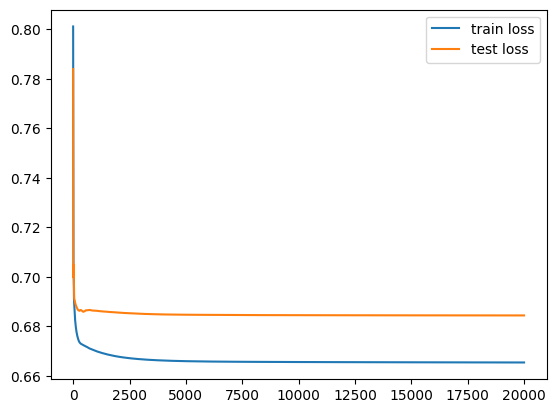

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

X, y = make_circles(n_samples=500, noise=0.2, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

n_train = 400
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

        for m in self.modules():
            if isinstance(m, nn.Linear):
                # nn.init.uniform_(m.weight, a=0, b=1)
                nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')


    def forward(self, x):
        return self.layers(x)


model = MLP()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9, weight_decay=1e-2)
# optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)

epochs = 20000
loss_hist = []
val_loss_hist = []
train_correct_hist = []
test_correct_hist = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.tensor(trainX, dtype=torch.float32))
    loss = criterion(outputs.squeeze(), torch.tensor(trainy, dtype=torch.float32))
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(torch.tensor(testX, dtype=torch.float32))
        val_loss = criterion(val_outputs.squeeze(), torch.tensor(testy, dtype=torch.float32))

        loss_hist.append(loss)
        val_loss_hist.append(val_loss)

        train_correct_hist.append((outputs.round().squeeze().numpy() == trainy).astype(float).mean())
        test_correct_hist.append((val_outputs.round().squeeze().numpy() == testy).astype(float).mean())


    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

pyplot.plot(range(0, epochs, 1), [loss.item() for loss in loss_hist], label='train loss')
pyplot.plot(range(0, epochs, 1), [val_loss.item() for val_loss in val_loss_hist], label='test loss')
# pyplot.plot(range(0, epochs, 1), train_correct_hist, label='train acc')
# pyplot.plot(range(0, epochs, 1), test_correct_hist, label='test acc')
pyplot.legend()
pyplot.show()

Epoch [500/20000], Loss: 0.6195, Val Loss: 0.6640
Epoch [1000/20000], Loss: 0.5925, Val Loss: 0.6643
Epoch [1500/20000], Loss: 0.5862, Val Loss: 0.6747
Epoch [2000/20000], Loss: 0.5825, Val Loss: 0.6818
Epoch [2500/20000], Loss: 0.5887, Val Loss: 0.6814
Epoch [3000/20000], Loss: 0.5726, Val Loss: 0.6847
Epoch [3500/20000], Loss: 0.5748, Val Loss: 0.6913
Epoch [4000/20000], Loss: 0.5856, Val Loss: 0.6974
Epoch [4500/20000], Loss: 0.5712, Val Loss: 0.7001
Epoch [5000/20000], Loss: 0.6106, Val Loss: 0.7042
Epoch [5500/20000], Loss: 0.5808, Val Loss: 0.7045
Epoch [6000/20000], Loss: 0.5680, Val Loss: 0.7053
Epoch [6500/20000], Loss: 0.5596, Val Loss: 0.7040
Epoch [7000/20000], Loss: 0.6271, Val Loss: 0.7038
Epoch [7500/20000], Loss: 0.5700, Val Loss: 0.7047
Epoch [8000/20000], Loss: 0.5828, Val Loss: 0.7044
Epoch [8500/20000], Loss: 0.5823, Val Loss: 0.7045
Epoch [9000/20000], Loss: 0.6007, Val Loss: 0.7061
Epoch [9500/20000], Loss: 0.5904, Val Loss: 0.7055
Epoch [10000/20000], Loss: 0.561

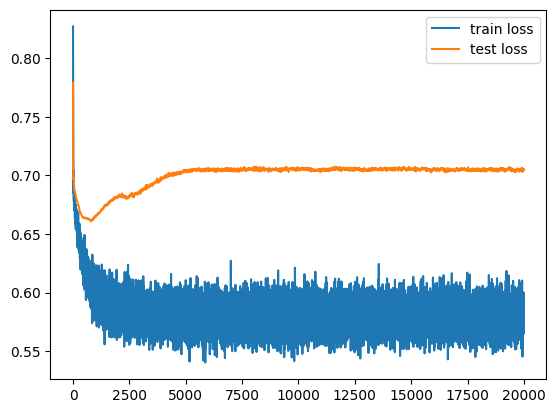

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

X, y = make_circles(n_samples=500, noise=0.2, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

n_train = 400
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

        for m in self.modules():
            if isinstance(m, nn.Linear):
                # nn.init.uniform_(m.weight, a=0, b=1)
                nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')


    def forward(self, x):
        return self.layers(x)


model = MLP()

criterion = nn.BCELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9, weight_decay=1e-2)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)

epochs = 20000
loss_hist = []
val_loss_hist = []
train_correct_hist = []
test_correct_hist = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.tensor(trainX, dtype=torch.float32))
    loss = criterion(outputs.squeeze(), torch.tensor(trainy, dtype=torch.float32))
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(torch.tensor(testX, dtype=torch.float32))
        val_loss = criterion(val_outputs.squeeze(), torch.tensor(testy, dtype=torch.float32))

        loss_hist.append(loss)
        val_loss_hist.append(val_loss)

        train_correct_hist.append((outputs.round().squeeze().numpy() == trainy).astype(float).mean())
        test_correct_hist.append((val_outputs.round().squeeze().numpy() == testy).astype(float).mean())


    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

pyplot.plot(range(0, epochs, 1), [loss.item() for loss in loss_hist], label='train loss')
pyplot.plot(range(0, epochs, 1), [val_loss.item() for val_loss in val_loss_hist], label='test loss')
# pyplot.plot(range(0, epochs, 1), train_correct_hist, label='train acc')
# pyplot.plot(range(0, epochs, 1), test_correct_hist, label='test acc')
pyplot.legend()
pyplot.show()

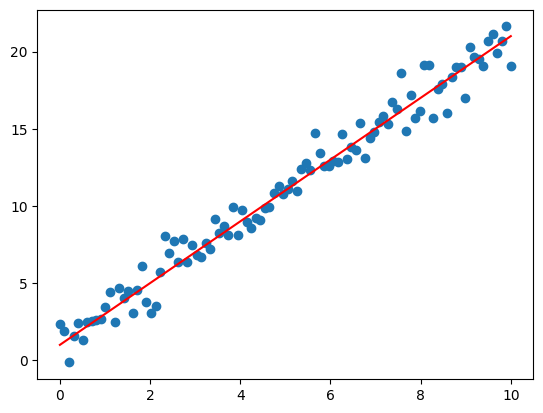

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

plt.scatter(X, y)
plt.plot(X, 2 * X + 1, color='red')
plt.show()

epoch 0 loss: 156.81967136065236
epoch 100 loss: 0.970096563026856
epoch 200 loss: 0.9698206625089318
epoch 300 loss: 0.9696154658709789
epoch 400 loss: 0.9694628302632796
epoch 500 loss: 0.969349275271608
epoch 600 loss: 0.969264782064625
epoch 700 loss: 0.9692019028956124
epoch 800 loss: 0.9691551003124541
epoch 900 loss: 0.9691202565746896


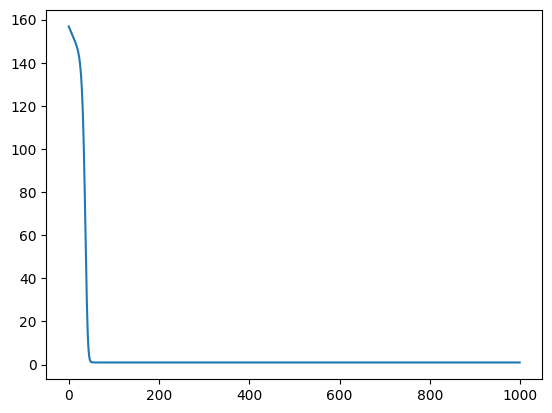

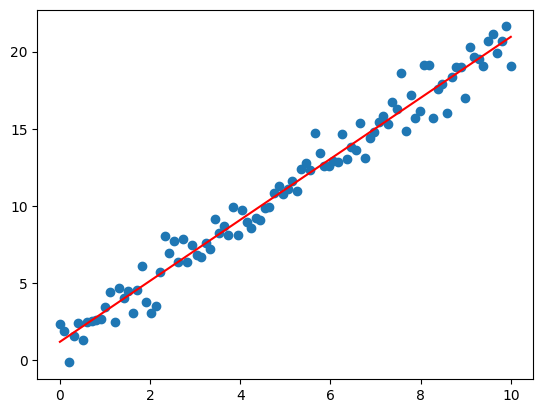

W1: 
 [[ 0.4  -0.02 -0.01 -0.   -0.   -0.   -0.    0.95  0.94 -0.01]]

W2: 
 [[ 0.4 ]
 [-0.  ]
 [ 0.02]
 [-0.01]
 [-0.  ]
 [-0.  ]
 [-0.  ]
 [ 0.96]
 [ 0.96]
 [-0.02]]


In [3]:
input_size = 1
output_size = 1
hidden_size = 10
lr = 0.001
epochs = 1000
lambda_reg = 0.01

W1 = np.random.randn(input_size, hidden_size) * 0.01
W2 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

n = len(X)
losses = []
for epoch in range(epochs):
    z1 = X @ W1 + b1
    a1 = np.maximum(0, z1)
    
    z2 = a1 @ W2 + b2
    y_p = z2
    
    dL_dyp = 2 / n * (y_p - y)
    dL_dW2 = a1.T @ dL_dyp + 2 * lambda_reg * W2
    # dL_db2 = dL_dyp.copy()
    # dL_db2 = np.sum(dL_dyp)
    dL_db2 = np.sum(dL_dyp, axis=0, keepdims=True)
    
    dL_da1 = dL_dyp @ W2.T
    dL_dz1 = dL_da1.copy()
    dL_dz1[z1 <= 0] = 0
    
    dL_dW1 = X.T @ dL_dz1 + 2 * lambda_reg * W1
    # dL_db1 = dL_dz1.copy()
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
    
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2
    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1
    
    loss = np.mean((y_p - y) ** 2)
    loss += lambda_reg * (np.sum(W1**2) + np.sum(W2 ** 2))
    losses.append(loss)
    if epoch % 100 == 0:
        
        print(f'epoch {epoch} loss: {loss}')
        
        
plt.plot(losses)
plt.show()


plt.scatter(X, y)
plt.plot(X, y_p, color='red')
plt.show()

print('W1: \n', np.round(W1, 2))
print('\nW2: \n', np.round(W2, 2))


epoch 0 loss: 156.7660445886659
epoch 100 loss: 0.9952474603848154
epoch 200 loss: 0.9900026744158764
epoch 300 loss: 0.9862398019431597
epoch 400 loss: 0.9828116951831466
epoch 500 loss: 0.9788682171593739
epoch 600 loss: 0.9769420365684633
epoch 700 loss: 0.9744097063129282
epoch 800 loss: 0.9731738227849545
epoch 900 loss: 0.9725940993264911


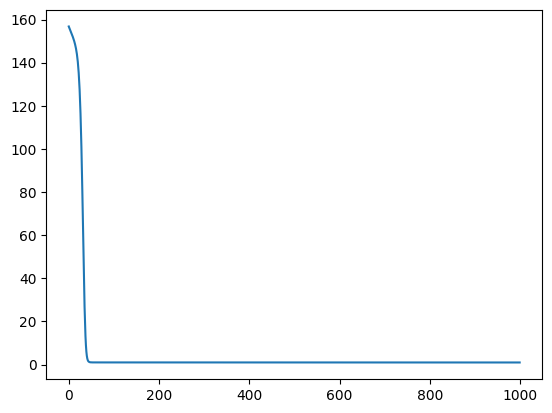

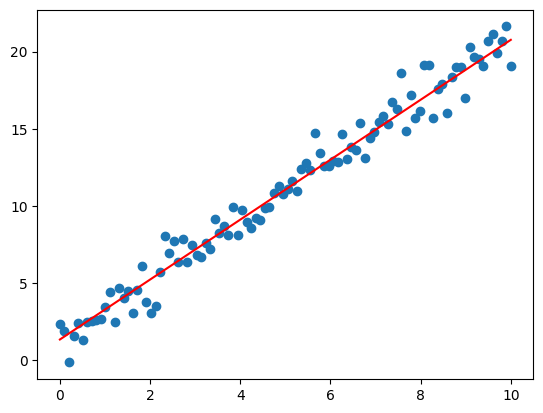

W1: 
 [[ 0.   -0.   -0.    0.22  0.   -0.   -0.    0.    1.36 -0.  ]]

W2: 
 [[ 0.  ]
 [-0.  ]
 [ 0.  ]
 [ 0.23]
 [ 0.  ]
 [ 0.  ]
 [-0.  ]
 [-0.  ]
 [ 1.39]
 [ 0.  ]]


In [4]:
input_size = 1
output_size = 1
hidden_size = 10
lr = 0.001
epochs = 1000
lambda_reg = 0.01

W1 = np.random.randn(input_size, hidden_size) * 0.01
W2 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

n = len(X)
losses = []
for epoch in range(epochs):
    z1 = X @ W1 + b1
    a1 = np.maximum(0, z1)
    
    z2 = a1 @ W2 + b2
    y_p = z2
    
    dL_dyp = 2 / n * (y_p - y)
    dL_dW2 = a1.T @ dL_dyp + np.sign(W2)
    # dL_db2 = dL_dyp.copy()
    # dL_db2 = np.sum(dL_dyp)
    dL_db2 = np.sum(dL_dyp, axis=0, keepdims=True)
    
    dL_da1 = dL_dyp @ W2.T
    dL_dz1 = dL_da1.copy()
    dL_dz1[z1 <= 0] = 0
    
    dL_dW1 = X.T @ dL_dz1 + np.sign(W1)
    # dL_db1 = dL_dz1.copy()
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
    
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2
    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1
    
    loss = np.mean((y_p - y) ** 2)
    loss += lambda_reg * (np.sum(np.abs(W1)) + np.sum(np.abs(W2)))
    losses.append(loss)
    if epoch % 100 == 0:
        
        print(f'epoch {epoch} loss: {loss}')
        
        
plt.plot(losses)
plt.show()


plt.scatter(X, y)
plt.plot(X, y_p, color='red')
plt.show()

print('W1: \n', np.round(W1, 2))
print('\nW2: \n', np.round(W2, 2))